Install Contrastive


In [1]:
!pip install contrastive

  Preparing metadata (setup.py) ... done
  Created wheel for contrastive: filename=contrastive-1.2.0-py3-none-any.whl size=6898 sha256=9d397164ac5dbca84ca765dbde4f618eb32785bd52a55e4942f20104cf9f745a
  Stored in directory: /root/.cache/pip/wheels/b4/2a/ad/111239c0d6a0b248f0ee4b903b6b44cc9cdfc1cfcff81ebba2
Successfully built contrastive


Download Iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import numpy as np

data = load_iris()
print(data.keys())


X_data = np.asarray(data["data"])
y_data = np.asarray(data["target"])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Create a noise generator feature

In [3]:
X_data_noise = np.zeros((4, 150))

for feature in range(len(X_data[0])):

    original_mean = np.mean(X_data[:,feature])
    original_std = np.std(X_data[:,feature])

    X_data_noise[feature] = np.random.normal(original_mean, original_std, 150)

Visualize real data and data with noise generation

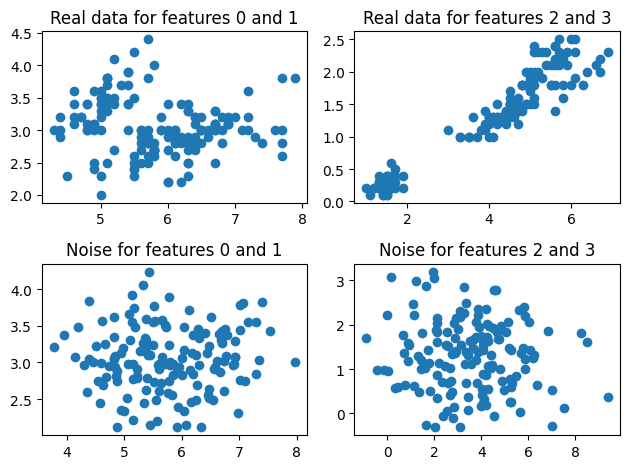

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
axs[0, 0].set_title("Real data for features 0 and 1")
axs[0, 0].scatter(X_data[:,0], X_data[:,1])
axs[0, 1].set_title("Real data for features 2 and 3")
axs[0, 1].scatter(X_data[:,2], X_data[:,3])
axs[1, 0].set_title("Noise for features 0 and 1")
axs[1, 0].scatter(X_data_noise[0], X_data_noise[1])
axs[1, 1].set_title("Noise for features 2 and 3")
axs[1, 1].scatter(X_data_noise[2], X_data_noise[3])
fig.tight_layout()

Implement PCA on 2 dimensions

In [5]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
X_data_original_compress = pca_model.fit_transform(X_data)

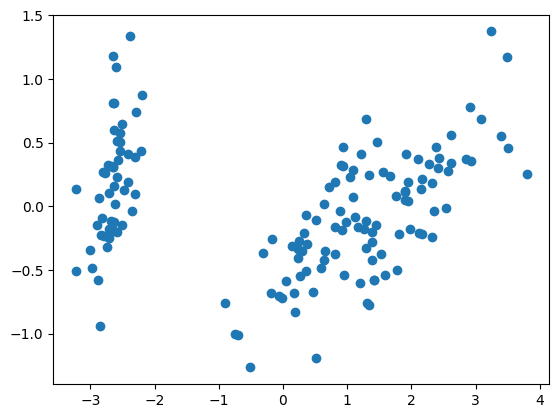

In [6]:
plt.scatter(X_data_original_compress[:,0], X_data_original_compress[:,1])

Run PCA

In [7]:
from contrastive import CPCA

print(X_data.shape)
print(X_data_noise.T.shape)
cpca_model = CPCA(n_components=2)
transformed_data = cpca_model.fit_transform(X_data, X_data_noise.T)
transformed_data = np.asarray(transformed_data)
print(transformed_data.shape)

(150, 4)
(150, 4)
(4, 150, 2)


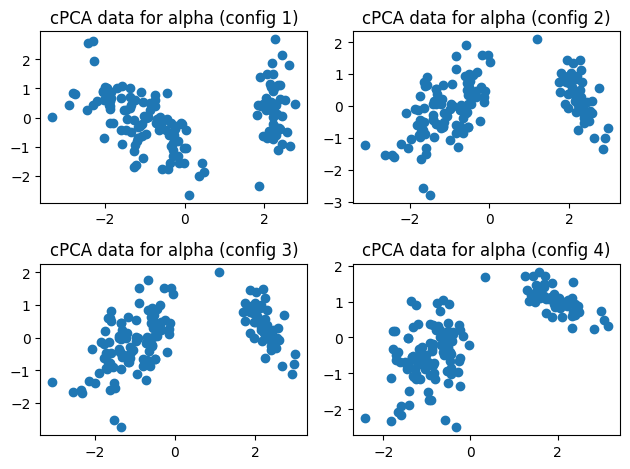

In [8]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)
P = transformed_data
axs[0, 0].set_title("cPCA data for alpha (config 1)")
axs[0, 0].scatter(P[0,:,0], P[0,:,1])
axs[0, 1].set_title("cPCA data for alpha (config 2)")
axs[0, 1].scatter(P[1,:,0], P[1,:,1])
axs[1, 0].set_title("cPCA data for alpha (config 3)")
axs[1, 0].scatter(P[2,:,0], P[2,:,1])
axs[1, 1].set_title("cPCA data for alpha (config 4)")
axs[1, 1].scatter(P[3,:,0], P[3,:,1])
fig.tight_layout()

Running k-NN on PCA-compressed data

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

mean_acc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_data_original_compress, y_data)
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    mean_acc.append(knn_clf.score(X_test, y_test))
print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

0.96316 +/- 0.02684


Running k-NN on original Iris data

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

mean_acc = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data)
    knn_clf = KNeighborsClassifier(n_neighbors=5)
    knn_clf.fit(X_train, y_train)
    mean_acc.append(knn_clf.score(X_test, y_test))
print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

0.95526 +/- 0.0354


Running on cPCA-compressed data, with different values for alpha (cPCA parameter)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

for i in range(len(transformed_data)):
    mean_acc = []
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(transformed_data[i], y_data)
        knn_clf = KNeighborsClassifier(n_neighbors=5)
        knn_clf.fit(X_train, y_train)
        mean_acc.append(knn_clf.score(X_test, y_test))
    print(f"{round(np.mean(mean_acc),5)} +/- {round(np.std(mean_acc),5)}")

0.89211 +/- 0.02989
0.91316 +/- 0.05137
0.91579 +/- 0.02294
0.90789 +/- 0.04119
